In [1]:
from matplotlib import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from tabulate import tabulate
from scipy.stats import norm
import scipy
from sklearn.linear_model import LinearRegression
#from pyfinance.ols import OLS
import pairtrading
import yfinance as yf

In [6]:
import sys
sys.path

['/home/kishor/Dropbox/stock/personal',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/kishor/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/kishor/.ipython']

In [3]:
pairtrading.Density_Curve_Trade_signal()

    Density Curve Value  STD Away    Prob. reverse to mean
-----------------------  ----------  -----------------------
                  0.16   -1 SD       65%
                  0.025  -2 SD       95%
                  0.003  -3 SD       99.7%
                  0.84   +1 SD       65%
                  0.974  +2 SD       95%
                  0.997  +3 SD       99.7%
  Trade Type    Trigger(Density Curve)    STD                  Target          Stoploss
--------------  ------------------------  -------------------  --------------  ---------------
Long            Between 0.025  & 0.003    Between 2nd and 3rd  0.25 or Lower   0.003 or Higher
Short           Between 0.975 & 0.997     Between 2nd & 3rd    0.975 or Lower  0.997 or Higher
Position    Action
----------  -------------------
Long        Buy A & Sell B
----------  -------------------
Short       Sell A & Buy B


In [3]:
tickers = ["HDFCBANK.NS","ICICIBANK.NS"]

#ohlc = yf.download(tickers, start="2020-01-01", end="2022-02-21")
ohlc = yf.download(tickers, start="2021-01-01", end="2022-04-12")
prices = ohlc["Close"]
#prices = prices.fillna(0)
#prices.head()

prices.to_csv("/home/kishor/pair.csv")
df = pd.read_csv("/home/kishor/pair.csv") 
df = df.fillna(0)

#df1 = pd.read_excel('/Users/kishor/Dropbox/stock/nb/icici.xlsx') #, usecols=[0,4]
#df2 = pd.read_excel('/users/kishor/Dropbox/stock/nb/hdfc.xlsx') #, usecols=[0,4]
'''Date = df1["Date"]
cl1 = round(df1["Close"],2)
cl2 = round(df2["Close"],2)

d = dict(A=Date, B=cl1,C=cl2)
df = pd.DataFrame(dict([ (pd.Series(k)) for k in d.items() ]))
df.columns = ["Date","ICICI","HDFCBANK"] 
df = df.fillna(0)
df.head() '''
df = df[['Date', 'HDFCBANK.NS', 'ICICIBANK.NS']]
df.head(5)

[*********************100%***********************]  2 of 2 completed


,Date,HDFCBANK.NS,ICICIBANK.NS
0,2021-01-01,1425.050049,527.500000
1,2021-01-04,1416.000000,531.700012
2,2021-01-05,1426.699951,537.250000
3,2021-01-06,1420.550049,546.700012
4,2021-01-07,1416.250000,541.099976


                   Spread    Differential     Ratio
-------------  ----------  --------------  --------
Mean            -0.509494        824.31    2.23222
Median          -0.324982        832.925   2.222
Mode           -11.35            783.95    1.997
Standard Dev.   20.4679           77.3317  0.231909
Abs. Dev.       14.4713           65.2135  0.196909
------------------------------------------------------
  STD            Spread    Differential    Ratio
-----------  ----------  --------------  -------
3             60.8942          1056.31   2.92795
2             40.4263           978.974  2.69604
1             19.9584           901.642  2.46413
Mean          -0.509494         824.31   2.23222
-1           -20.9774           746.979  2.00031
-2           -41.4453           669.647  1.7684
-3           -61.9131           592.315  1.53649


,Date,Close1,Close_diff1,Close2,Close_diff2,Spread,Differential,Ratio,Density Curve(Ratio)
0,2021-01-01,1425.050049,0.000000,527.500000,0.000000,0.000000,897.550049,2.702,0.978767
1,2021-01-04,1416.000000,-9.050049,531.700012,4.200012,-13.250061,884.299988,2.663,0.968591
2,2021-01-05,1426.699951,10.699951,537.250000,5.549988,5.149963,889.449951,2.656,0.966394
3,2021-01-06,1420.550049,-6.149902,546.700012,9.450012,-15.599915,873.850037,2.598,0.942918
4,2021-01-07,1416.250000,-4.300049,541.099976,-5.600037,1.299988,875.150024,2.617,0.951725
...,...,...,...,...,...,...,...,...,...
311,2022-04-05,1608.250000,-48.550049,741.799988,-4.799988,-43.750061,866.450012,2.168,0.390750
312,2022-04-06,1550.849976,-57.400024,741.599976,-0.200012,-57.200012,809.250000,2.091,0.270958
313,2022-04-07,1516.750000,-34.099976,748.549988,6.950012,-41.049988,768.200012,2.026,0.186560
314,2022-04-08,1514.650024,-2.099976,754.299988,5.750000,-7.849976,760.350037,2.008,0.166426


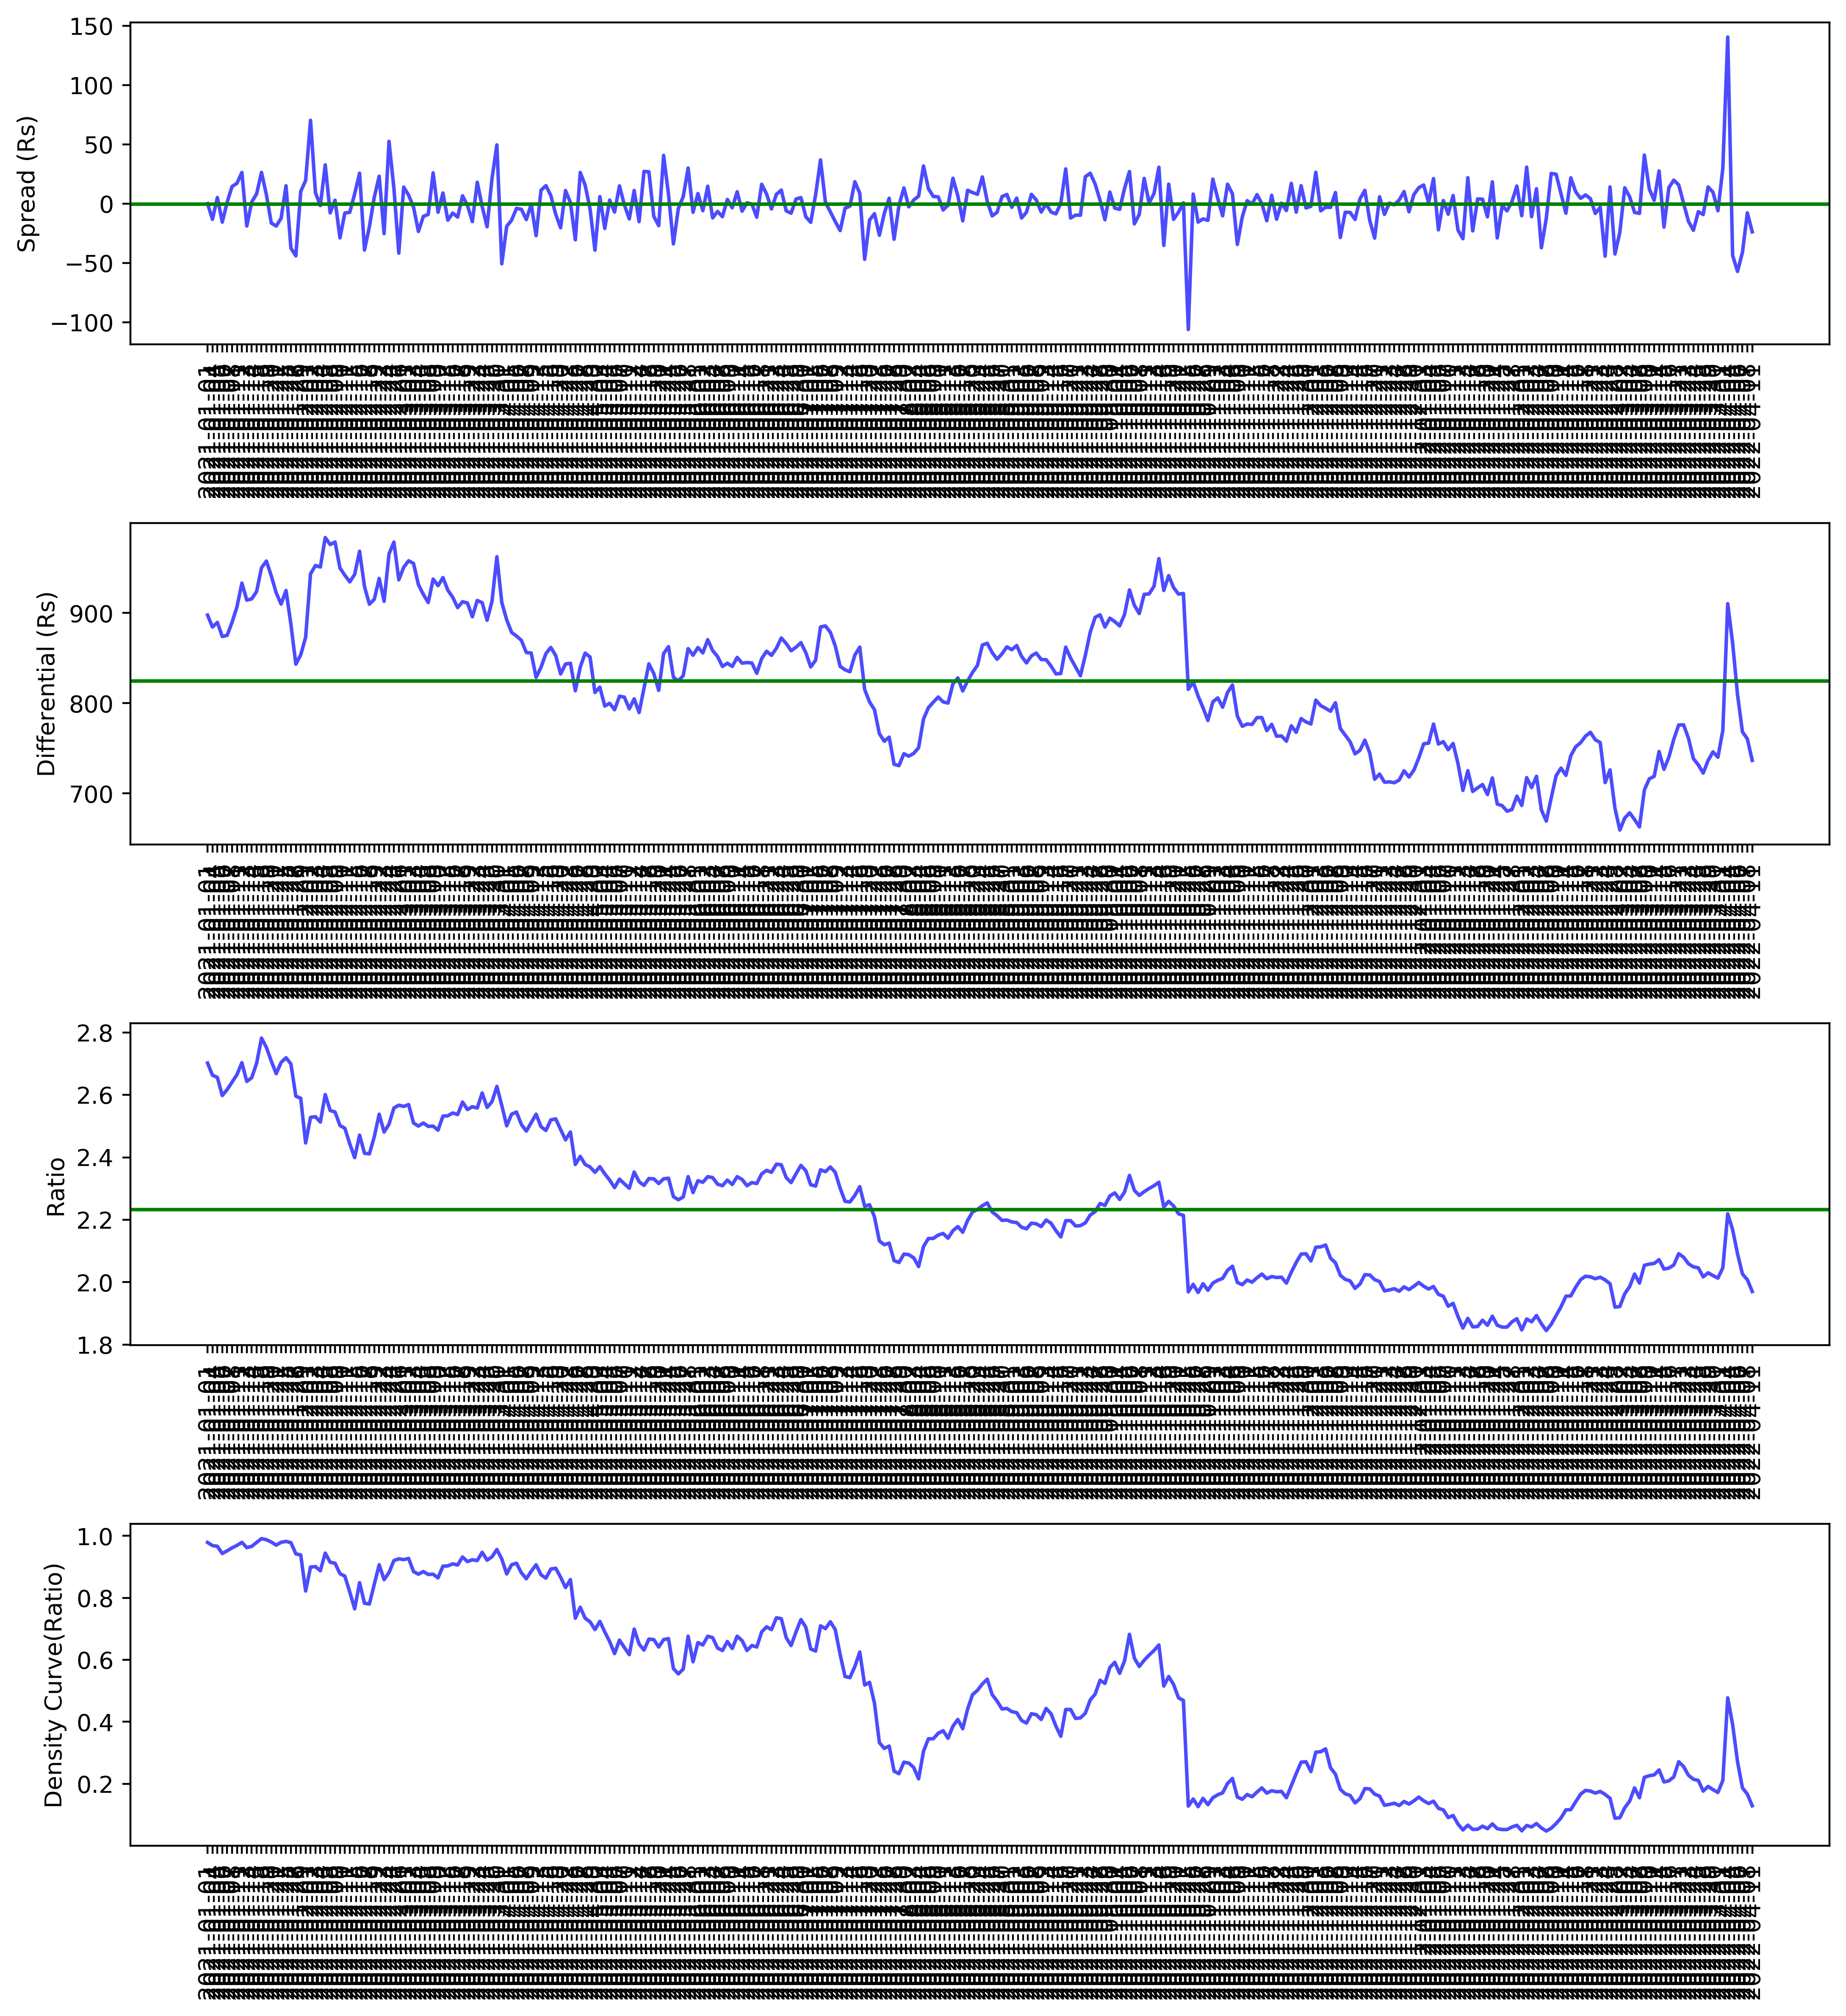

In [4]:
pairtrading.Density_Curve(df)

In [6]:
df_n1 = pairtrading.Relative_X(df)
print("---------------------------------------------------")
df_n2 = pairtrading.Relative_Y(df)

AttributeError: module 'pairtrading' has no attribute 'Relative_X'

In [7]:
from statsmodels.tsa.stattools import adfuller
signif=0.05
adf = adfuller(df_n2.iloc[:,1], autolag='AIC')

#using dictionary saves different data types (float, int, boolean)
output = {'Test Statistic': adf[0], 
         'P-value': adf[1], 
        'Number of lags': adf[2], 
         'Number of observations': adf[3],
         f'Reject (signif. level {signif})': adf[1] < signif }

for key, val in adf[4].items():
    output[f'Critical value {key}'] = val

pd.Series(output)

Test Statistic                -3.510763
P-value                        0.007715
Number of lags                        4
Number of observations              491
Reject (signif. level 0.05)        True
Critical value 1%             -3.443739
Critical value 5%             -2.867444
Critical value 10%            -2.569915
dtype: object

In [9]:
xn = df_n2.iloc[:,1]
df_n2.apply(lambda xn: adfuller(xn), axis=0)

,Predicted X,Residuals1
0,0.360861,-3.510763
1,0.979971,0.007715
2,0,4
3,495,491
4,"{'1%': -3.4436298692815304, '5%': -2.867396599...","{'1%': -3.4437386290417082, '5%': -2.867444458..."
5,1470.097497,2945.266983


In [10]:
yn = df_n1.iloc[:,1]
df_n1.apply(lambda yn: adfuller(yn), axis=0)

,Predicted Y,Residuals1
0,-1.649504,-2.951754
1,0.457299,0.039652
2,4,5
3,491,490
4,"{'1%': -3.4437386290417082, '5%': -2.867444458...","{'1%': -3.4437660979098843, '5%': -2.867456546..."
5,4903.083034,4893.70383
